<a href="https://colab.research.google.com/github/Bioinformatician-dev/Alzheimer-s-Disease-Classification-/blob/main/Alzheimer's_Disease_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Installing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', None)
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

**Reading and Understanding our Data**

In [ ]:
df = pd.read_csv('/content/alzheimers-disease-dataset/alzheimers_disease_data.csv')

In [ ]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [ ]:
df.head().T

,0,1,2,3,4
PatientID,4751,4752,4753,4754,4755
Age,73,89,73,74,89
Gender,0,0,0,1,0
Ethnicity,0,0,3,0,0
EducationLevel,2,0,1,1,0
BMI,22.927749,26.827681,17.795882,33.800817,20.716974
Smoking,0,0,0,1,0
AlcoholConsumption,13.297218,4.542524,19.555085,12.209266,18.454356
PhysicalActivity,6.327112,7.619885,7.844988,8.428001,6.310461
DietQuality,1.347214,0.518767,1.826335,7.435604,0.795498


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [ ]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,0.252210,0.144253,0.150768,0.200558,0.092601,0.148906,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496,14.755132,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,0.434382,0.351428,0.357906,0.400511,0.289940,0.356079,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721,8.613151,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222,7.167602,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983,14.441660,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046,22.161028,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,299.993352,199.965665,99.980324,399.941862,29.991381,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


In [ ]:
# Count duplicated rows in the DataFrame
sum(df.duplicated())

0

In [ ]:
# Count occurrences of each unique value in the 'DoctorInCharge'
df.DoctorInCharge.value_counts()

,count
DoctorInCharge,
XXXConfid,2149


In [ ]:
# Drop unnecessary columns from the DataFrame
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

**Initial Data Exploration Summary**

The dataset contains a total of 2,149 observations.
All values in the dataset are non-null and numerical.
There are no duplicate records.
After removing the `DoctorInCharge` and `PatientID` columns, the dataset consists of 33 features.

**Data Visualization**

In [ ]:
# Identify numerical columns: columns with more than 10 unique values are considered numerical
numerical_columns = [col for col in df.columns if df[col].nunique() > 10]

# Identify categorical columns: columns that are not numerical and not 'Diagnosis'
categorical_columns = df.columns.difference(numerical_columns).difference(['Diagnosis']).to_list()

**Distribution of Categorical Features**

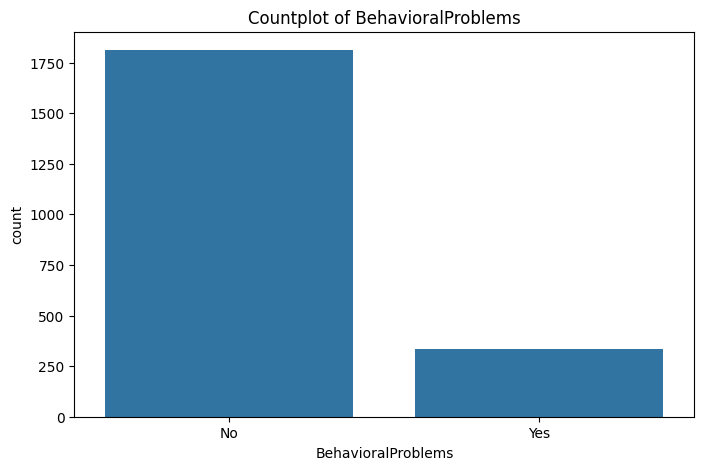

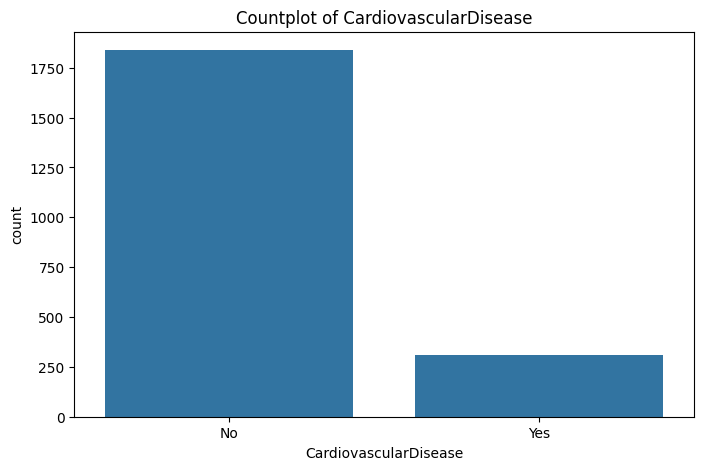

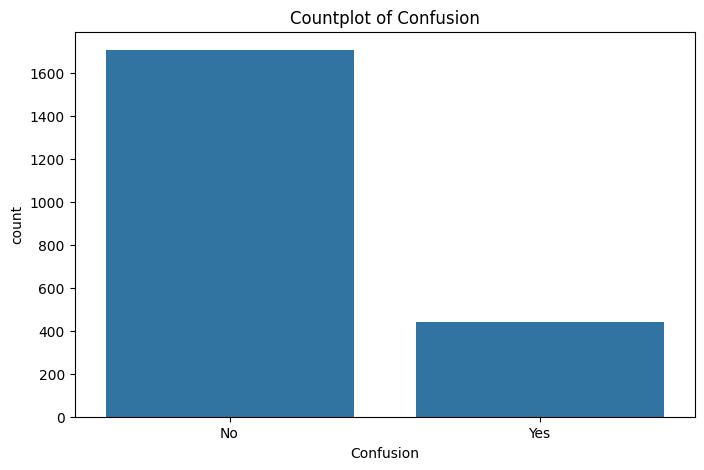

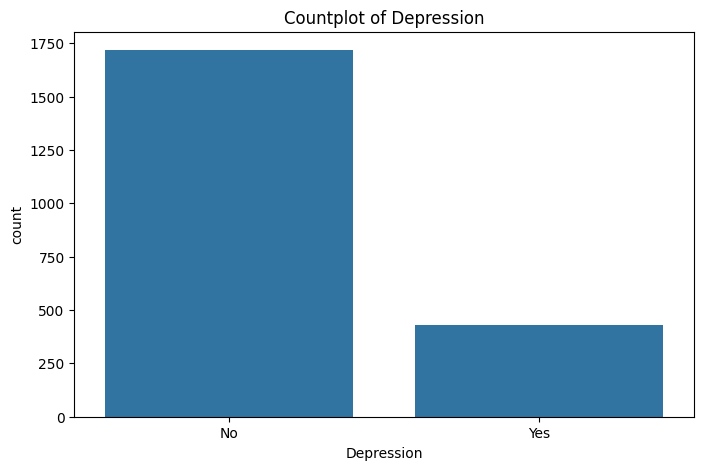

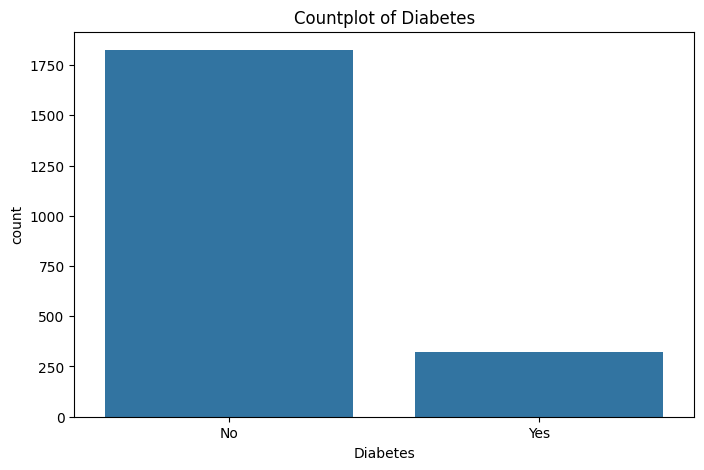

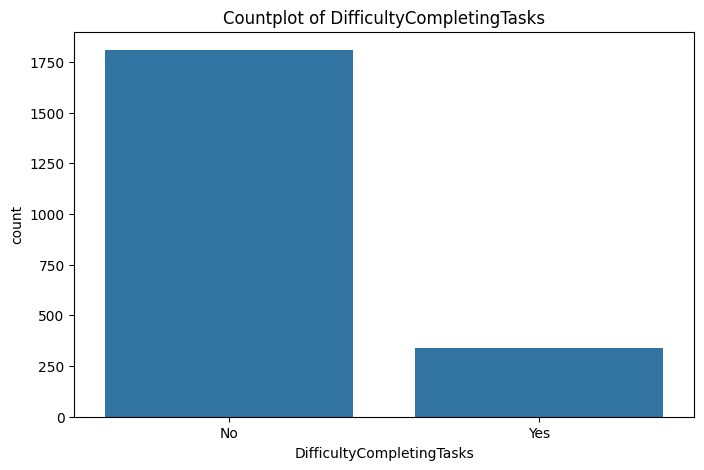

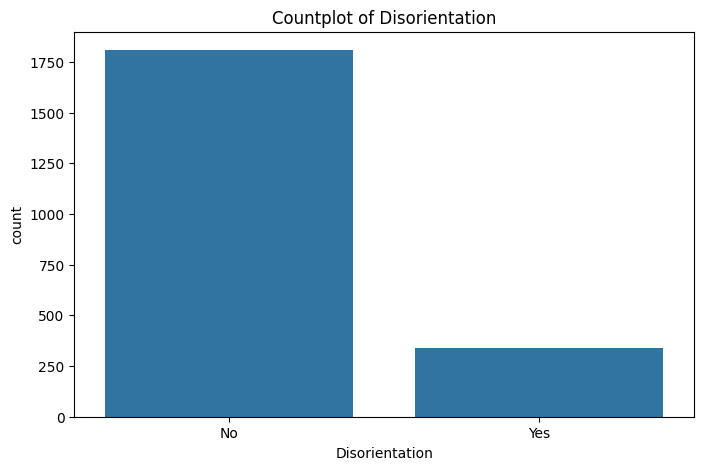

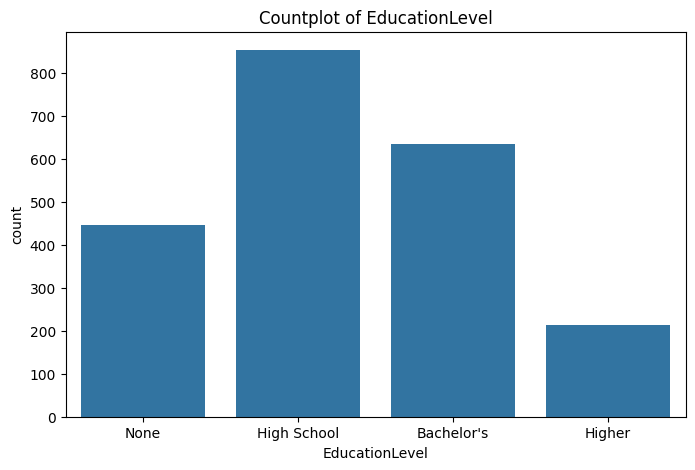

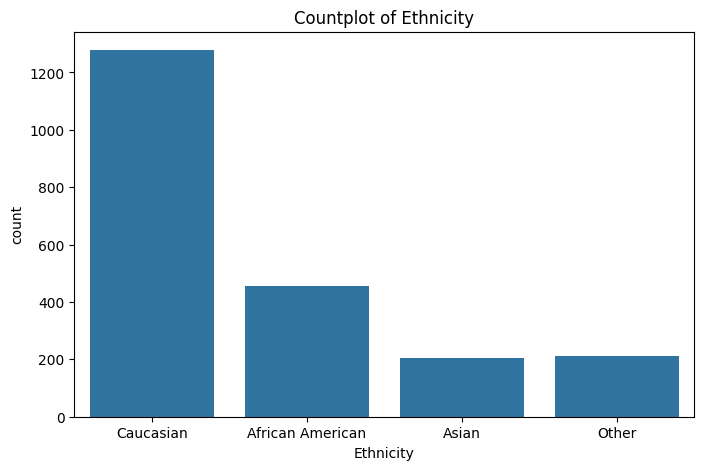

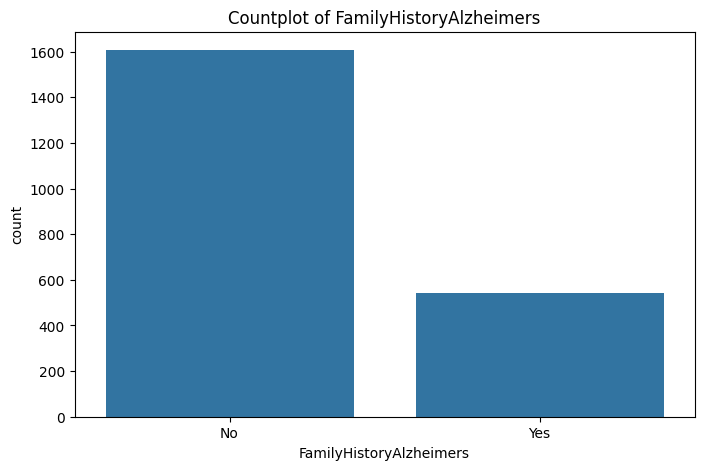

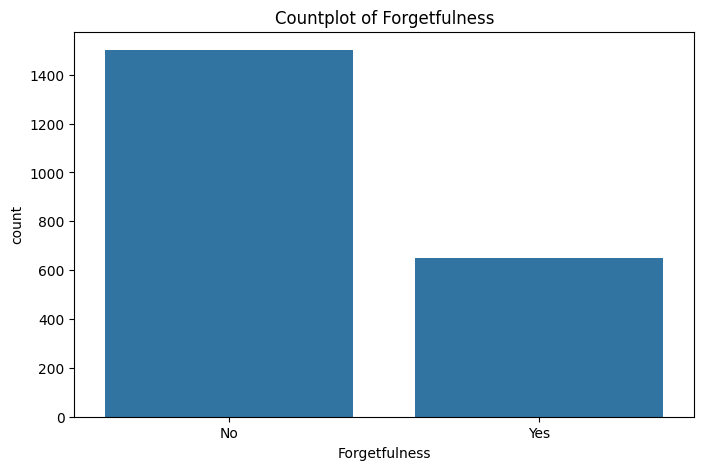

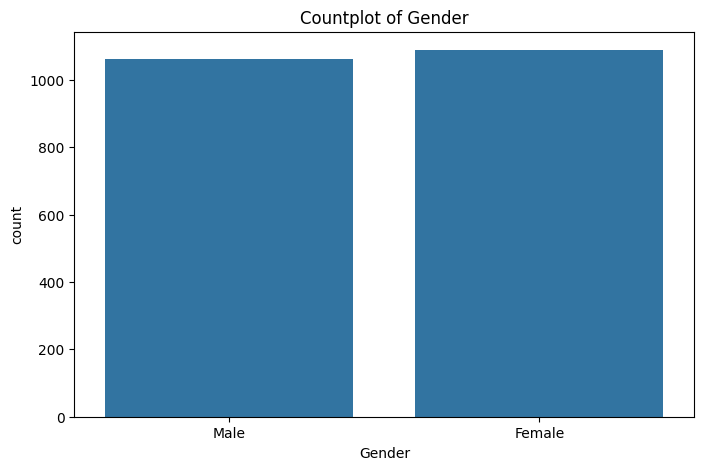

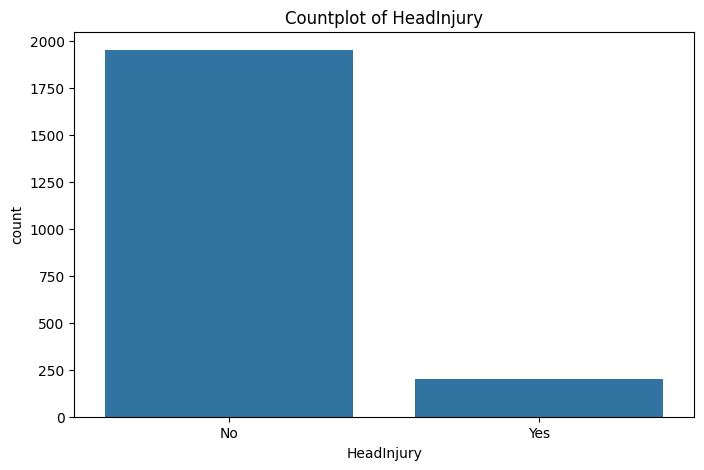

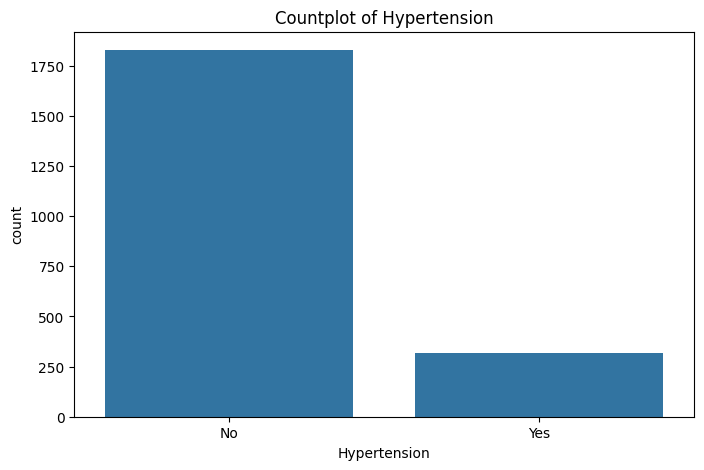

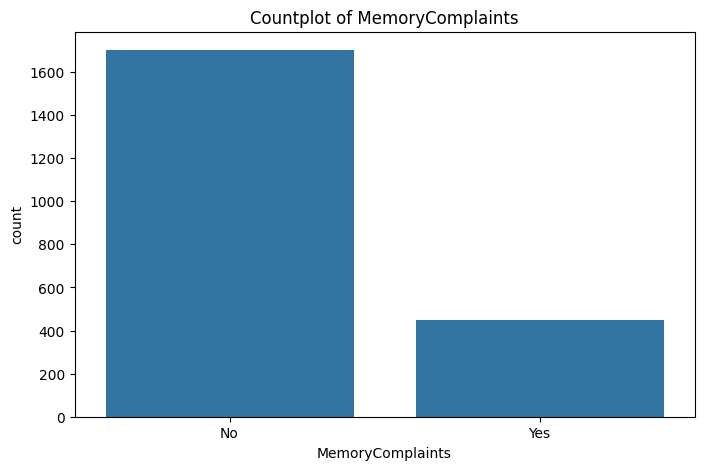

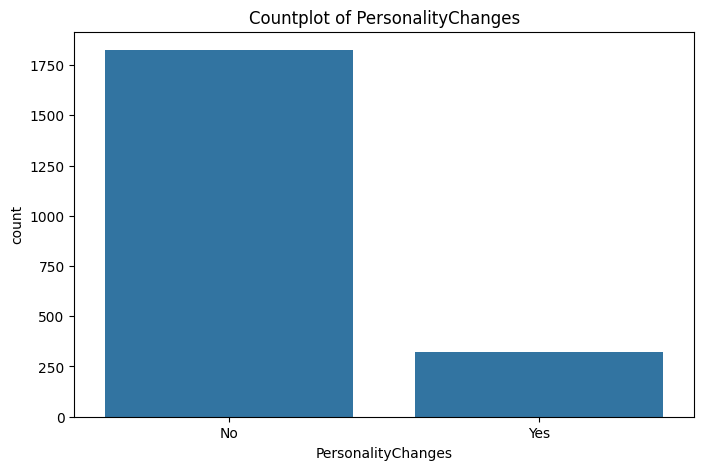

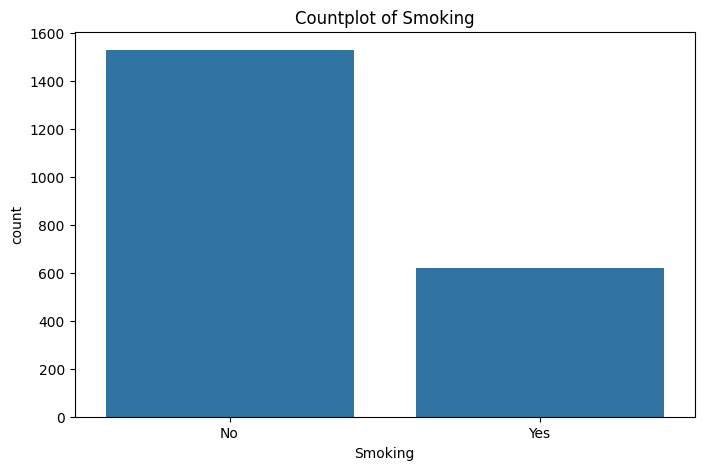

In [ ]:
# Custom labels for the categorical columns
custom_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']
}

# Plot countplots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')

    # Directly set custom labels
    labels = custom_labels[column]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)

    plt.show()

**Observations from Visualization of Categorical Features**

Overall, the dataset predominantly consists of individuals without disease or health problems.
Caucasian. The most represented demographic is
High school graduates constitute the largest educational group, closely followed by individuals with a bachelor's degree.
Notably, both females and males are equally represented across the dataset.

**Distribution of Numerical Features**

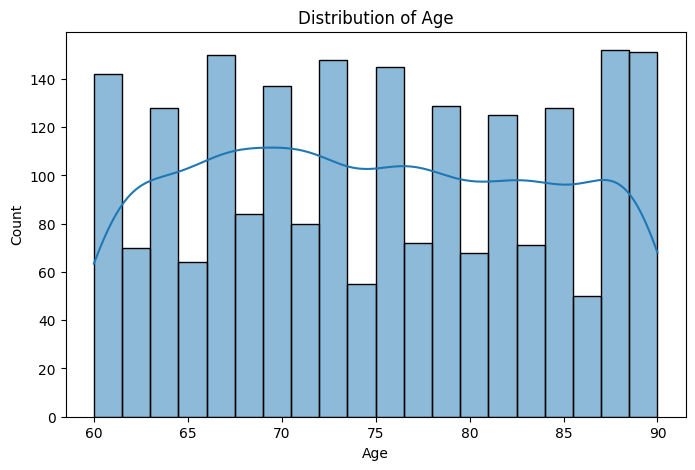

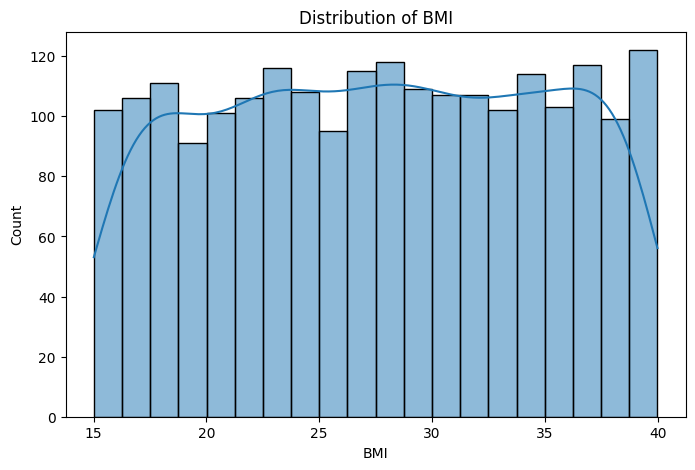

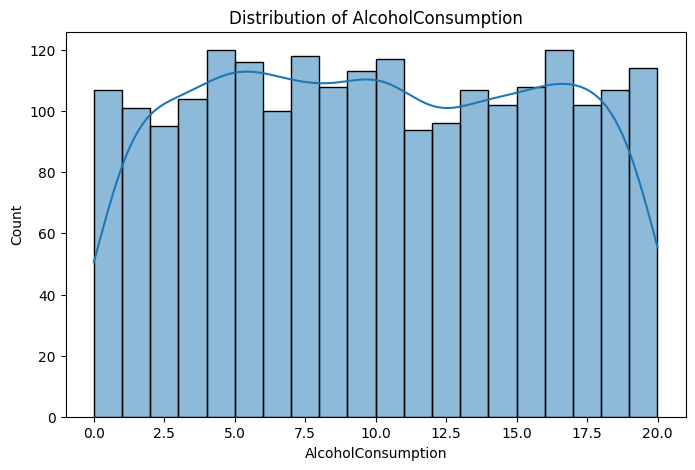

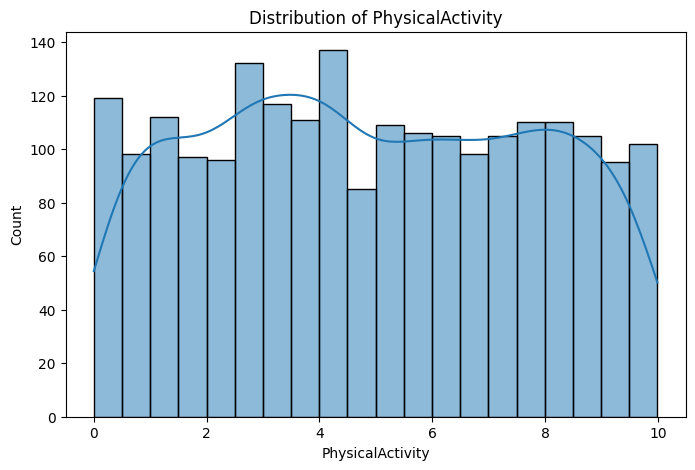

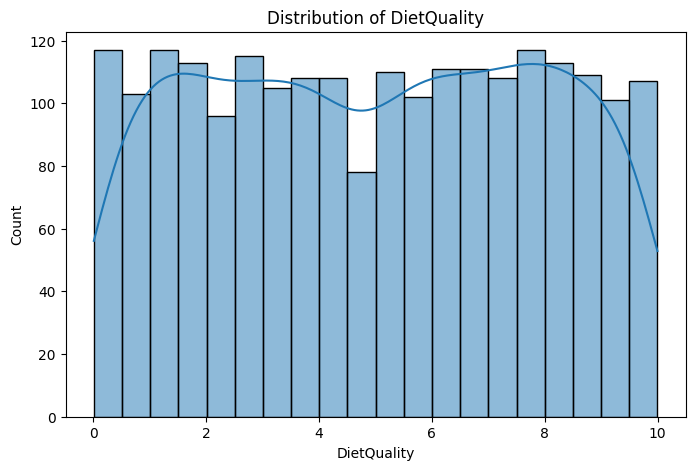

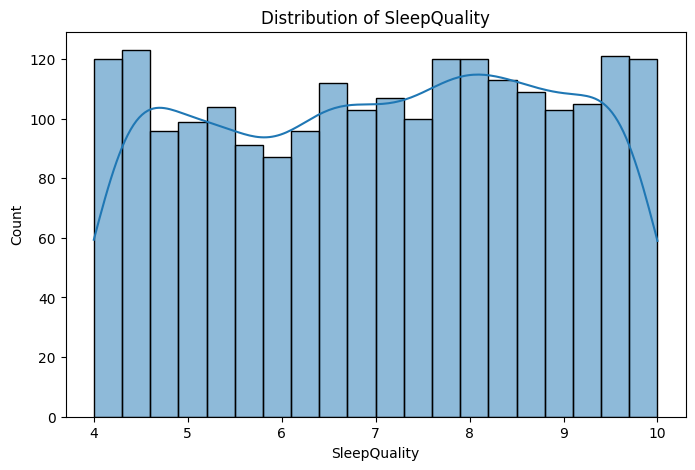

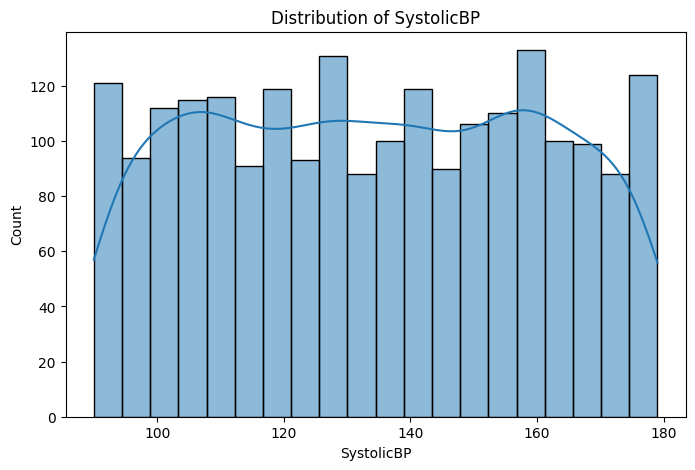

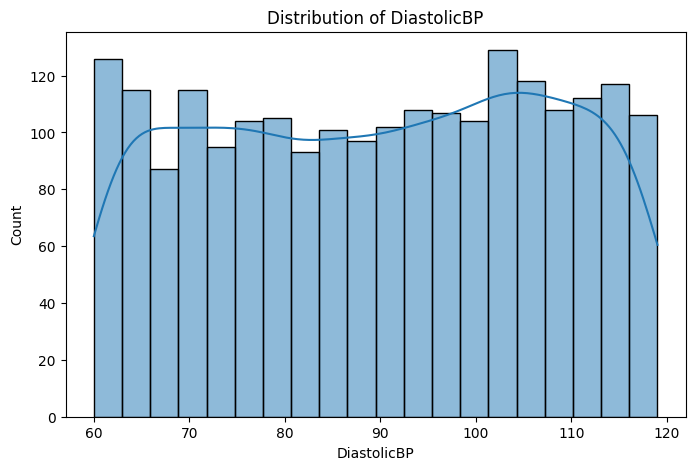

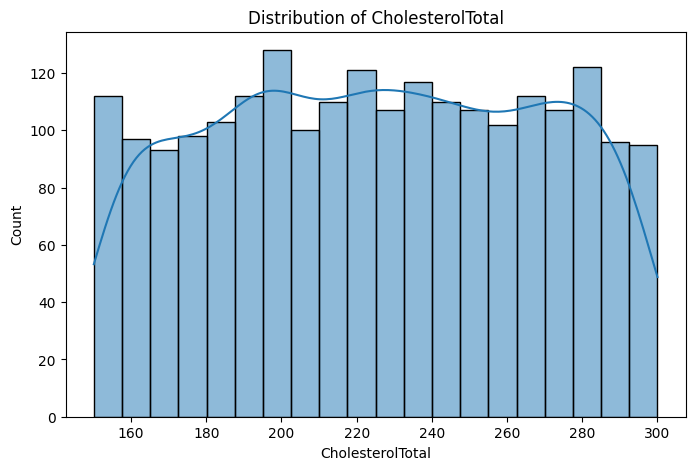

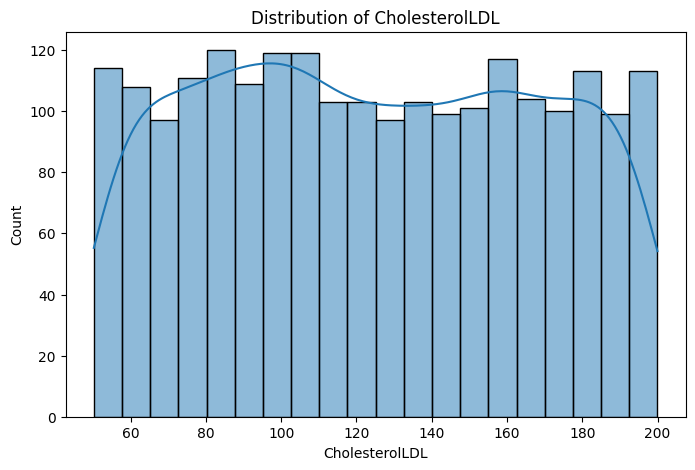

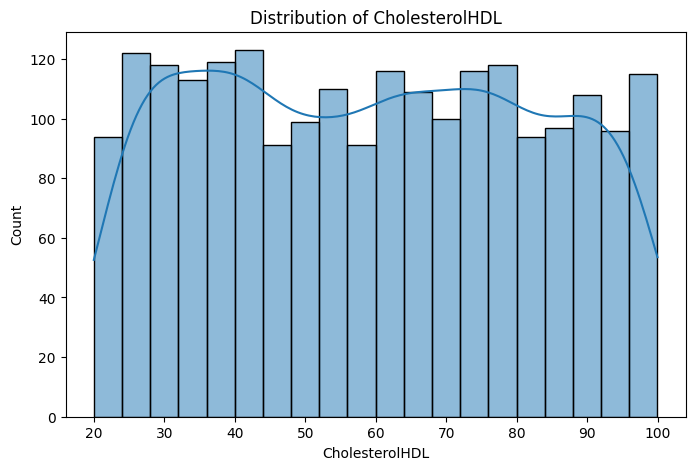

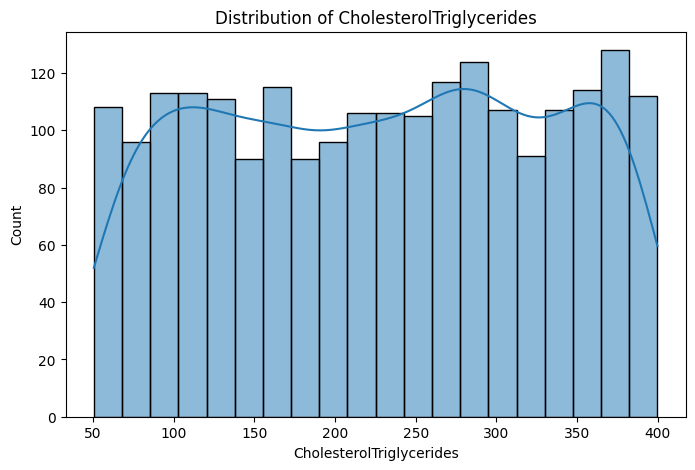

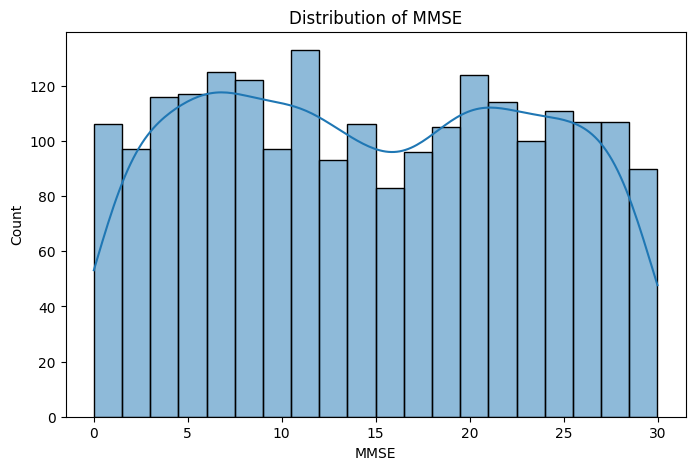

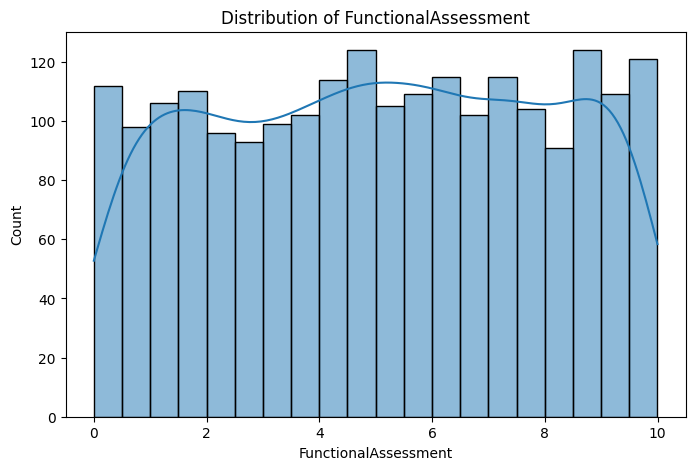

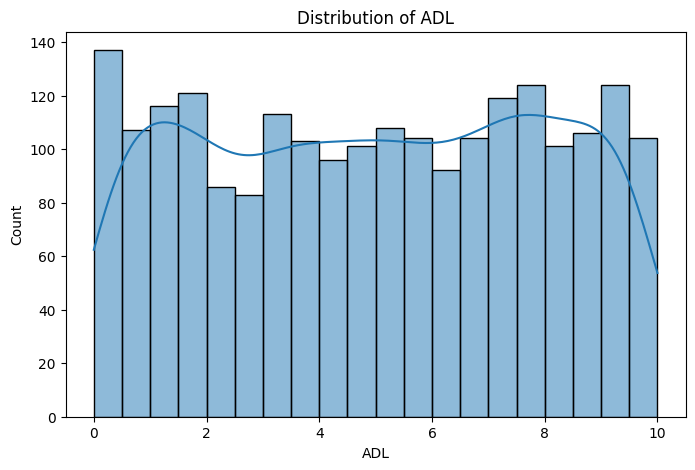

In [ ]:
# Plot histogram for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()

**Exploring Correlations**

**Observations from Visualization of Numerical Features**

Most of the columns show a fairly uniform distribution.
The `MMSE` (Mini-Mental State Examination) scores appear to follow a bimodal distribution, indicating two distinct groups within the data.

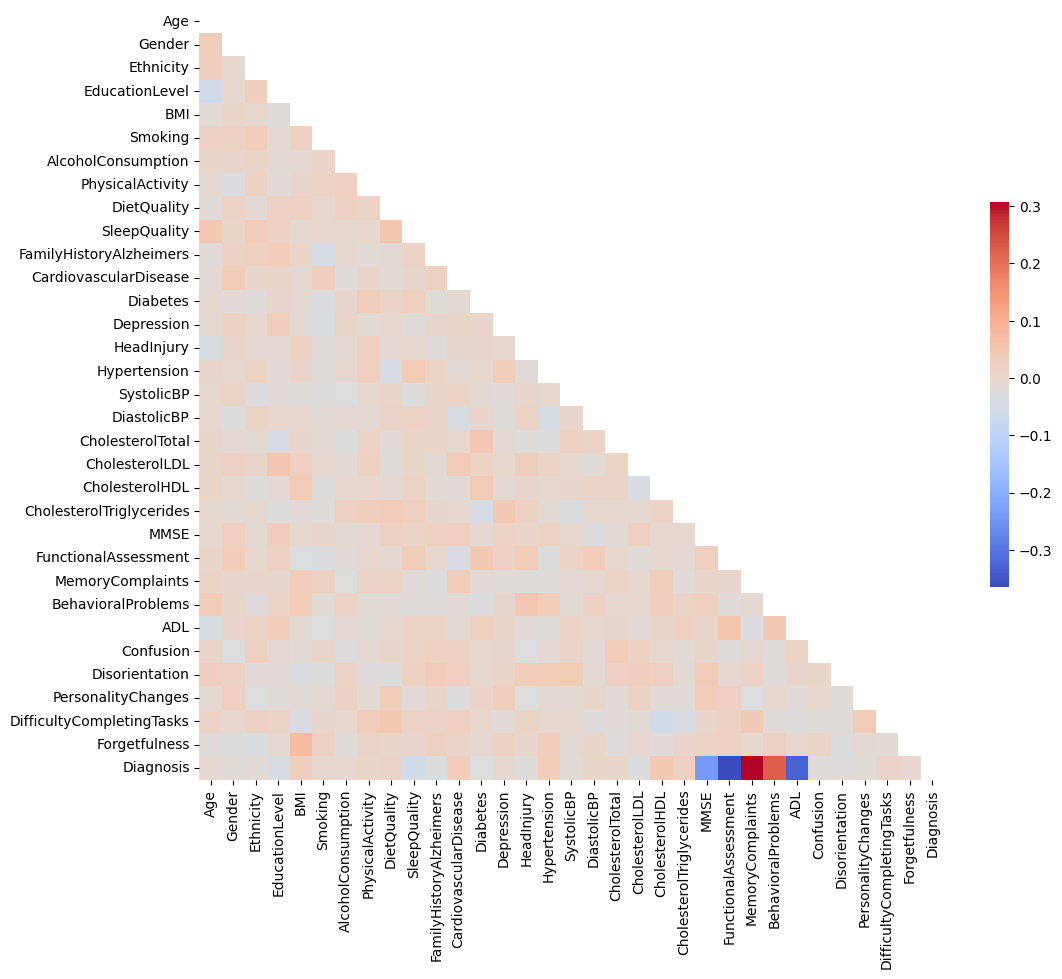

In [ ]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),cmap="coolwarm", cbar_kws={"shrink": .5}, mask=mask)

plt.show()

The heatmap reveals that the features do not have any strong correlations among themselves. However, there are five columns that show a correlation with the target variable.

Let's calculate Pearson correlation coefficient, also known as Pearson's r. It is a measure of the linear relationship between two variables. It quantifies the degree to which a pair of variables are linearly related, ranging from -1 to 1.

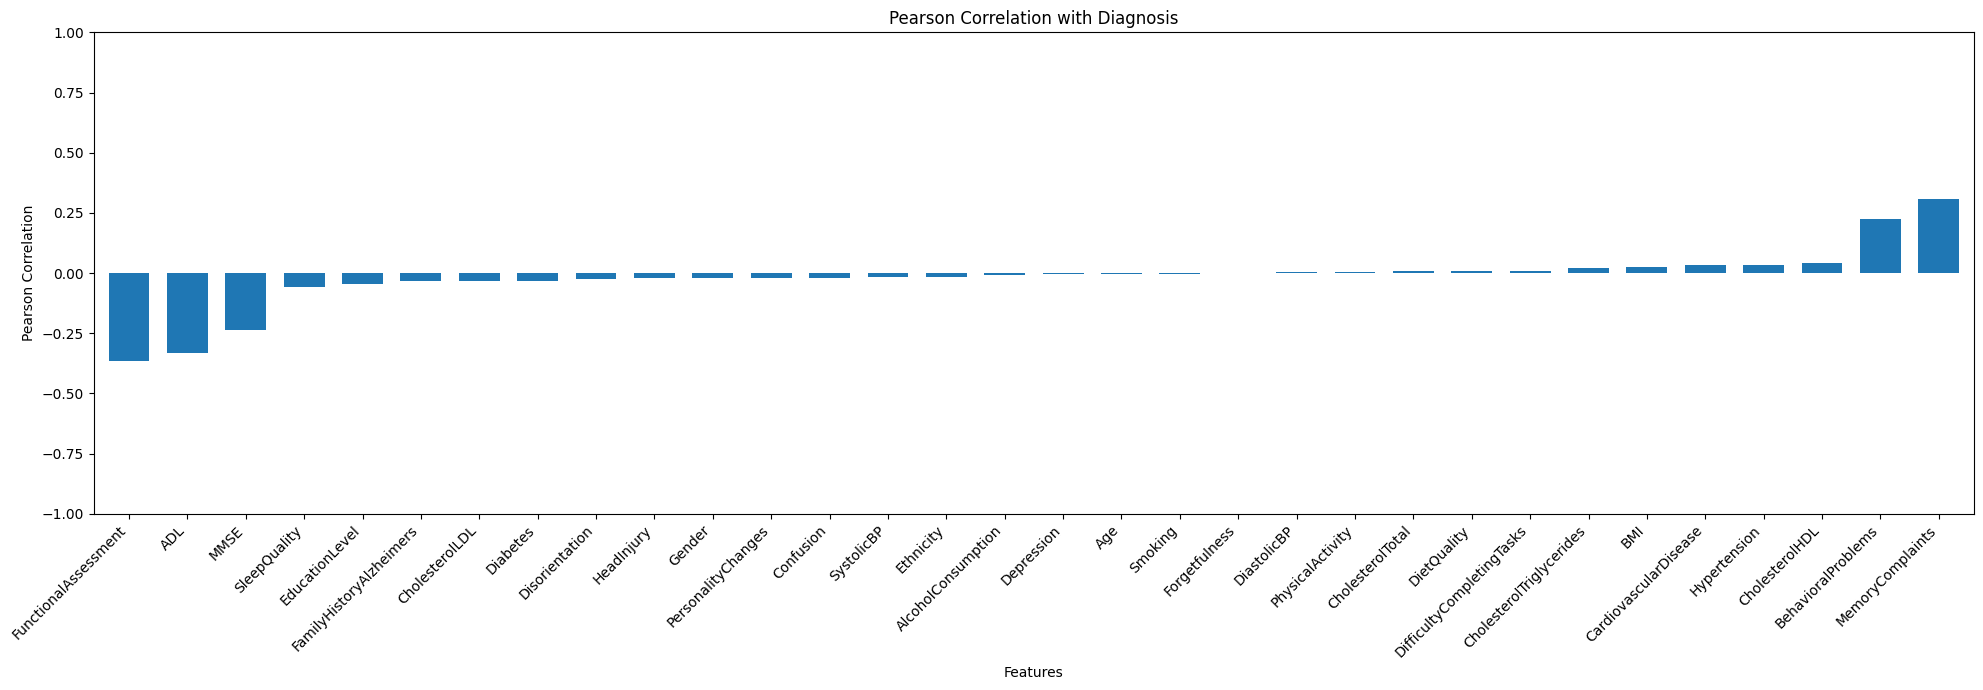

In [ ]:
# Compute Pearson correlation coefficients
correlations = df.corr(numeric_only=True)['Diagnosis'][:-1].sort_values()

# Set the size of the figure
plt.figure(figsize=(20, 7))

# Create a bar plot of the Pearson correlation coefficients
ax = correlations.plot(kind='bar', width=0.7)

# Set the y-axis limits and labels
ax.set(ylim=[-1, 1], ylabel='Pearson Correlation', xlabel='Features',
       title='Pearson Correlation with Diagnosis')

# Rotate x-axis labels for better readability
ax.set_xticklabels(correlations.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()


And now let's plot the distribution of the most correlated columns across different 'Diagnosis' categories.

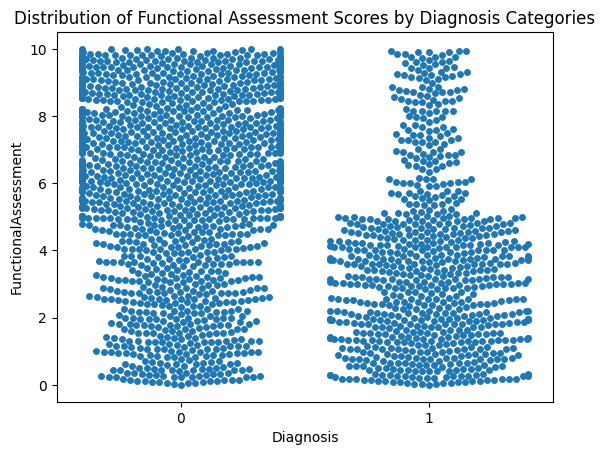

In [ ]:
sns.swarmplot(data=df, y='FunctionalAssessment', x='Diagnosis')
plt.title(f'Distribution of Functional Assessment Scores by Diagnosis Categories')
plt.show()

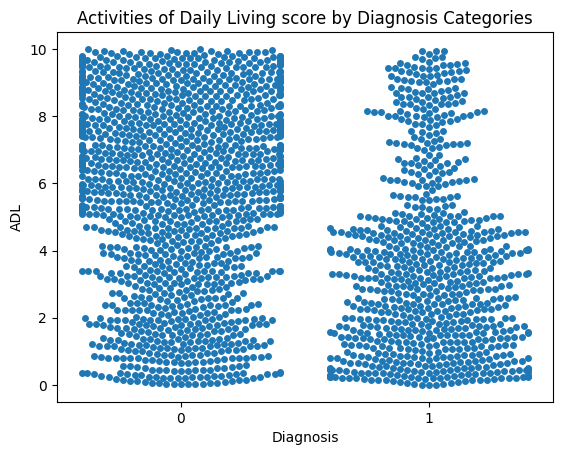

In [ ]:
sns.swarmplot(data=df, y='ADL', x='Diagnosis')
plt.title(f'Activities of Daily Living score by Diagnosis Categories')
plt.show()

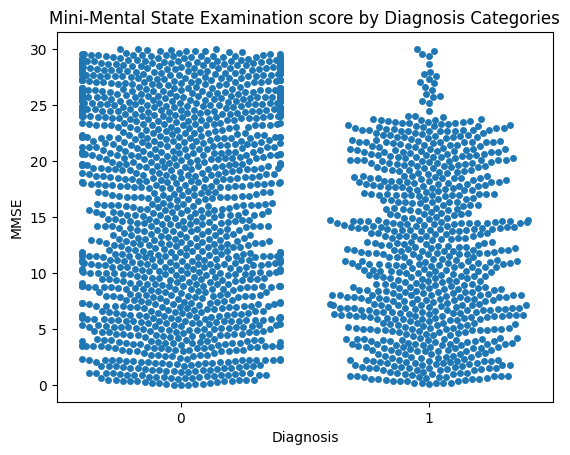

In [ ]:
sns.swarmplot(data=df, y='MMSE', x='Diagnosis')
plt.title(f'Mini-Mental State Examination score by Diagnosis Categories')
plt.show()

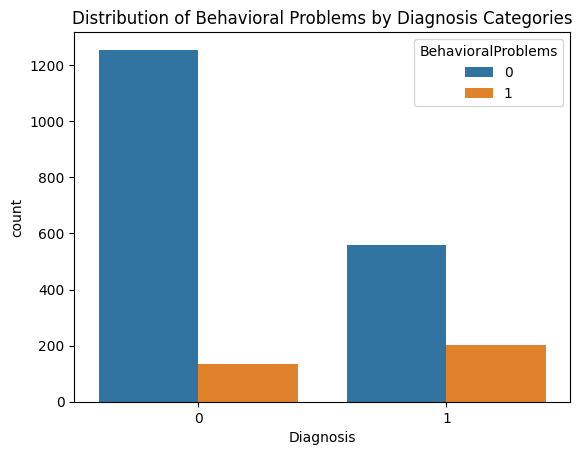

In [ ]:
sns.countplot(data=df, x='Diagnosis', hue='BehavioralProblems')
plt.title(f'Distribution of Behavioral Problems by Diagnosis Categories')
plt.show()

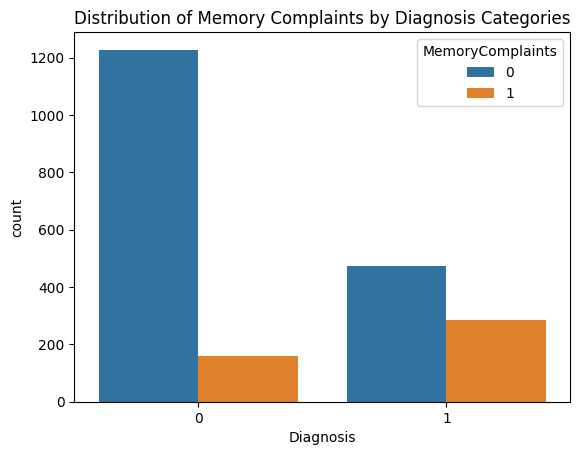

In [ ]:
sns.countplot(data=df, x='Diagnosis', hue='MemoryComplaints')
plt.title(f'Distribution of Memory Complaints by Diagnosis Categories')
plt.show()

Observations from Exploring Correlations


*   As observed, there are five columns correlated with the target variable.
*   Three numerical features—`Functional Assessment`, `ADL` (Activities of Daily Living), and `MMSE` (Mini-Mental State Examination)—are negatively correlated with the `diagnosis of Alzheimer's disease`, with correlation coefficients of -0.36, -0.33, and -0.24 respectively. This indicates that lower scores in these assessments are associated with a higher likelihood of an Alzheimer's diagnosis.

*  Additionally, two categorical variables—`Behavioral Problems` and `Memory Complaints`—are positively correlated with the `diagnosis`, with correlation coefficients of 0.22 and 0.30 respectively. This means the presence of these issues is associated with a higher likelihood of an Alzheimer's diagnosis, highlighting their significance in the diagnostic process.









**Distribution of a Target Variable**

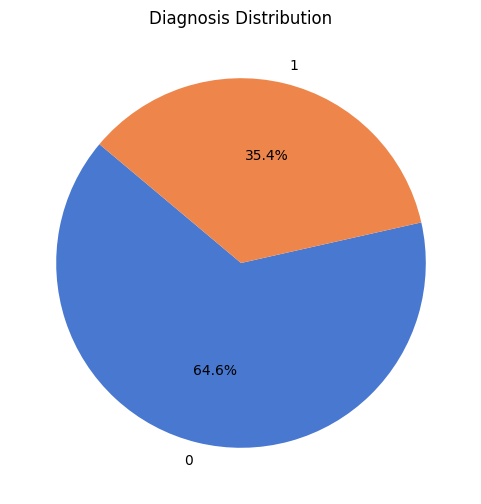

In [ ]:
# Define the Response categories and count occurences
categories = [0, 1]
counts = df.Diagnosis.value_counts().tolist()

# Choose a color palette from Seaborn for the pie chart
colors = sns.color_palette("muted")

# Plot the pie chart with the counts of each response category
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Diagnosis Distribution')
plt.show()

**Observation from the Target Distribution**

Our target variable is moderately imbalanced, with 65% of instances being 0 and 35% being 1.

**Data Pre-Processing**

In [ ]:
df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,0,0,3.785399,0,0,0,0,1,1


In [ ]:
#unique values in each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'Age':
[73 89 74 86 68 75 72 87 78 84 64 69 63 65 82 77 71 83 79 67 66 70 85 60
 88 62 81 61 80 90 76]

Unique values in column 'Gender':
[0 1]

Unique values in column 'Ethnicity':
[0 3 1 2]

Unique values in column 'EducationLevel':
[2 0 1 3]

Unique values in column 'BMI':
[22.92774923 26.82768119 17.79588244 ... 15.47647896 15.29991122
 33.28973831]

Unique values in column 'Smoking':
[0 1]

Unique values in column 'AlcoholConsumption':
[13.29721773  4.54252382 19.55508453 ...  4.59467018  8.67450518
  7.89070315]

Unique values in column 'PhysicalActivity':
[6.32711247 7.61988454 7.84498779 ... 9.88600229 6.35428175 6.57099338]

Unique values in column 'DietQuality':
[1.34721431 0.51876714 1.82633466 ... 8.12002455 1.26342749 7.94140388]

Unique values in column 'SleepQuality':
[9.02567867 7.15129274 9.67357416 ... 5.76946355 8.32287396 9.87871052]

Unique values in column 'FamilyHistoryAlzheimers':
[0 1]

Unique values in column 'CardiovascularDisease':
[0

In [ ]:
columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

#normalize the columns
min_max_scaler = MinMaxScaler()
df[columns] = min_max_scaler.fit_transform(df[columns])

#standardize the columns
standard_scaler = StandardScaler()
df[columns] = standard_scaler.fit_transform(df[columns])

In [ ]:
df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,-0.212368,0,0,2,-0.655225,0,0.565923,0.492525,-1.253593,1.119918,0,0,1,1,0,0,0.298159,-1.014750,0.403677,-1.572661,-1.114429,-0.648199,0.779037,0.497506,0,0,-1.104434,0,0,0,1,0,0
1,1.567757,0,0,0,-0.114751,0,-0.954895,0.945093,-1.538442,0.056836,0,0,0,0,0,0,-0.742572,-1.469595,0.140248,1.593119,0.845730,0.650721,0.680297,0.704907,0,0,-0.810601,0,0,0,0,1,0
2,-0.212368,0,3,1,-1.366428,0,1.653006,1.023896,-1.088855,1.487380,1,0,0,0,0,0,-1.359301,1.486898,1.386812,0.668569,0.445615,-1.418585,-0.859222,0.281813,0,0,0.724491,0,1,0,1,0,0
3,-0.101111,1,0,1,0.851625,1,0.376930,1.227995,0.839804,0.760833,0,0,0,0,0,0,-0.626935,1.430043,-1.542715,-1.360103,0.388780,0.483468,-0.088723,1.343346,0,1,0.508044,0,0,0,0,0,0
4,1.567757,0,0,0,-0.961607,0,1.461793,0.486696,-1.443293,-0.824566,0,0,0,0,0,0,-1.552029,1.543754,0.291653,-0.725756,-0.111924,0.617060,-0.143712,0.333665,0,0,-1.684679,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,-1.547463,0,0,1,1.589030,0,-1.472807,-0.304649,0.537127,0.274767,0,0,0,0,0,0,-0.472753,0.634063,1.299701,-0.679609,0.063957,0.061185,-1.574000,-1.674022,0,0,-0.166194,1,0,0,0,0,1
2145,0.010147,0,0,2,-1.357833,0,1.516149,-1.246106,-0.718090,0.853112,0,0,0,0,0,0,0.683615,0.918342,-0.912555,-0.667149,1.477761,1.370158,-0.963527,1.247350,0,1,1.431627,0,0,0,0,0,1
2146,0.232663,0,0,1,-1.687864,0,-0.945836,1.738405,1.075131,-0.726886,0,0,0,0,0,0,-0.742572,1.600609,0.278072,0.736484,1.738352,0.652402,0.261971,-1.074634,0,0,0.018099,0,0,0,0,0,1
2147,0.343921,1,3,1,-1.712334,0,-0.237109,0.502036,-1.282402,0.721313,0,1,0,0,0,0,-1.205119,0.349785,0.399688,-1.657260,0.943104,-0.814293,-1.245437,0.032446,0,0,-0.406078,0,0,0,0,1,1


**Modelling**

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       277
           1       0.92      0.87      0.90       153

    accuracy                           0.93       430
   macro avg       0.93      0.91      0.92       430
weighted avg       0.93      0.93      0.93       430

Best Parameters: {'max_depth': 5}



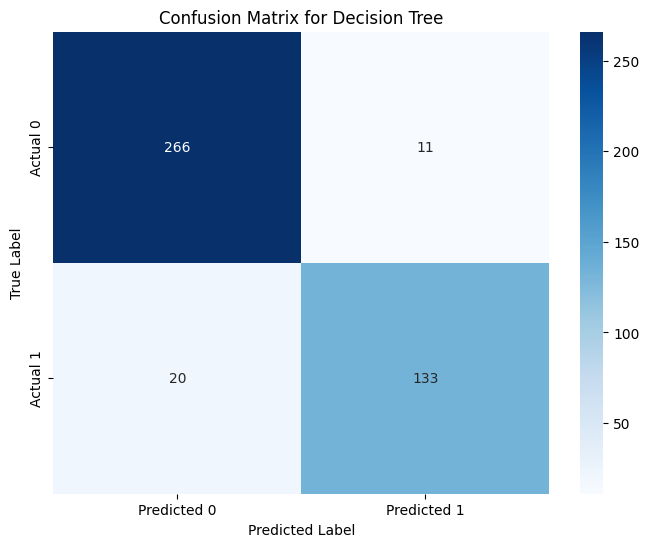

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       277
           1       0.96      0.84      0.90       153

    accuracy                           0.93       430
   macro avg       0.94      0.91      0.92       430
weighted avg       0.93      0.93      0.93       430

Best Parameters: {'max_depth': 12, 'n_estimators': 200}



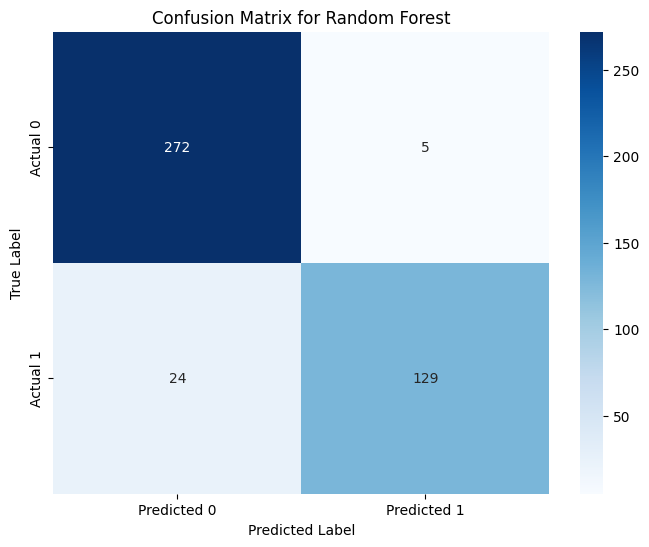

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       277
           1       0.66      0.46      0.54       153

    accuracy                           0.72       430
   macro avg       0.70      0.67      0.67       430
weighted avg       0.71      0.72      0.71       430

Best Parameters: {'n_neighbors': 5}



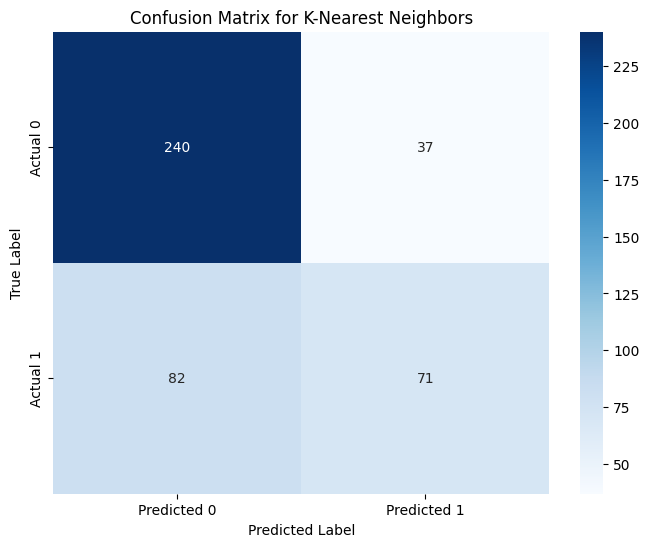

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       277
           1       0.79      0.71      0.75       153

    accuracy                           0.83       430
   macro avg       0.82      0.80      0.81       430
weighted avg       0.83      0.83      0.83       430

Best Parameters: {'C': 1}



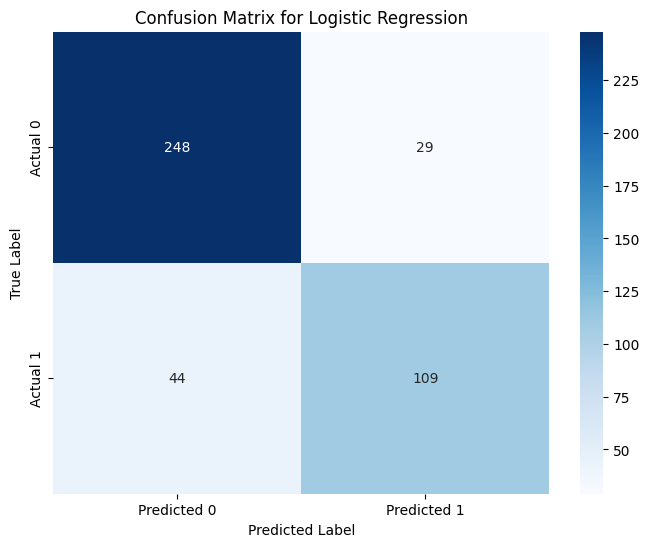

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       277
           1       0.82      0.69      0.75       153

    accuracy                           0.83       430
   macro avg       0.83      0.80      0.81       430
weighted avg       0.83      0.83      0.83       430

Best Parameters: {'C': 1, 'gamma': 'scale'}



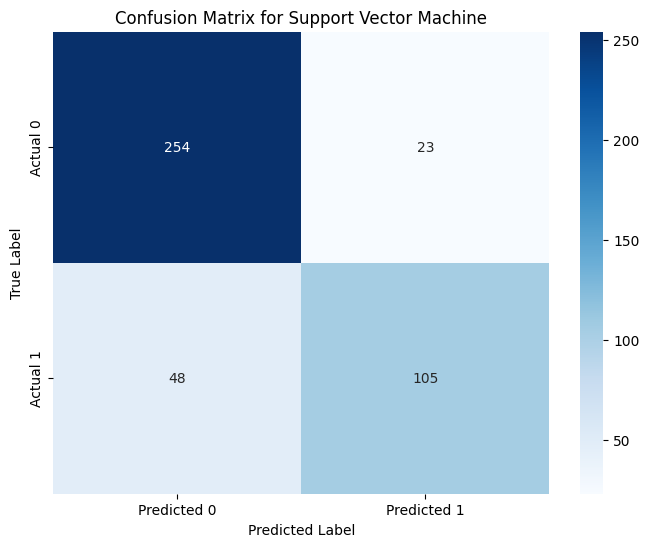

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       277
           1       0.95      0.92      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}



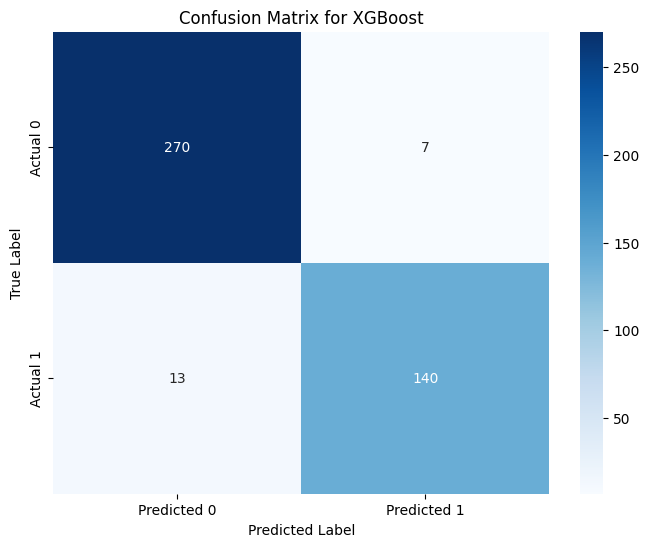

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       277
           1       0.96      0.92      0.94       153

    accuracy                           0.96       430
   macro avg       0.96      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430

Best Parameters: {'iterations': 100, 'learning_rate': 0.01}



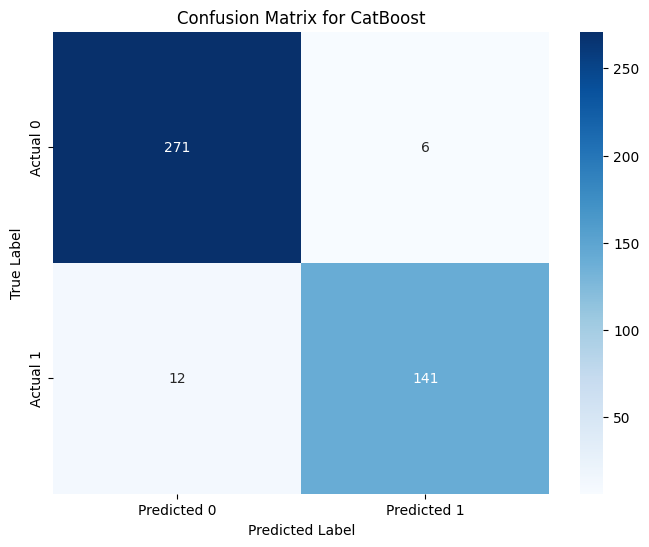

In [ ]:
#split data into features and target
X = df.drop(columns = ['Diagnosis'])
y = df['Diagnosis']

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

#define hyperparameter grids for each model
param_grids = {
    'Decision Tree': {'max_depth': [3, 5, 7, 12, None]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 12, None]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7]},
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto']},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]},
    'CatBoost': {'iterations': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
}

#instantiate classification models with default parameters
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

#fit models using GridSearchCV for hyperparameter tuning
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv = 5, scoring = 'f1')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f'{name} Classification Report:\n{report}\nBest Parameters: {grid_search.best_params_}\n')

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

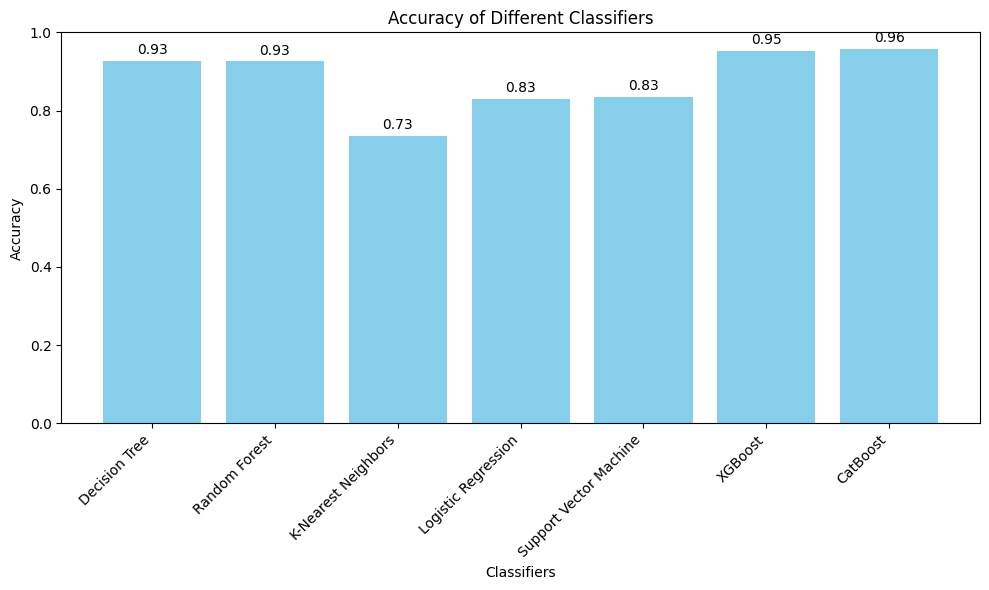

In [ ]:
accuracy = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv = 5, scoring = 'accuracy') # Changed scoring to accuracy
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy[name] = best_model.score(X_test,y_test) # Store the accuracy

plt.figure(figsize=(10, 6))
bars = plt.bar(accuracy.keys(), accuracy.values(), color='skyblue')
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Classifiers")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for percentage

# Add accuracy values on top of each bar
for bar, acc in zip(bars, accuracy.values()):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(acc, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()
